# EDA-Netflix

## Import Library
import library yang dibutuhkan


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import btext as bt
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter


In [3]:

print(pd.__version__)

1.2.2


## Load Data
Data yang digunakan berasal dari Kaggle.com dalam bentuk CSV. Kemudian ditampilkan secara keseluruhan. CSV yang di read ditampung dalam variable df

In [7]:
df=pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## EDA

### Tipe Data
menggunakan df.dtypes untuk melihat tipe data dari setiap kolom yang ada pada dataset

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Dimensi
Dengan menggunakan df.shape, melihat dimensi dari dataset. Dataset memiliki 7787 baris dan 12 kolom

In [9]:
df.shape

(7787, 12)

## EDA - Data Cleaning
Data cleaning bertujuan agar dataset yang akan kita gunakan sudah bersih dari nilai null. Sehingga, eksplorasi akan menampilkan hasil yang lebih baik.

### Menghitung Nilai Null
dengan menggunakan .isna() digunakan untuk mendeteksi nilai dari setiap cell yang null. Jika cell berisi tulisan 'kosong' = tidak null

In [10]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Drop Baris Null
Dengan menggunakan dropna() akan menghapus setiap baris yang mengandung nilai null. jika ingin menghapus kolom, gunakan .dropna(axis='column')

In [11]:
df = df.dropna(axis='rows')

In [12]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Dimensi Dataset
setelah dibersihkan dimensi dataset menjadi 4808 baris dan 12 kolom

In [13]:
df.shape

(4808, 12)

In [14]:
df.count()

show_id         4808
type            4808
title           4808
director        4808
cast            4808
country         4808
date_added      4808
release_year    4808
rating          4808
duration        4808
listed_in       4808
description     4808
dtype: int64

melihat tahun rilis tertua

In [15]:
df.release_year.max()

2021

menampilkan tayangan dengan tahun rilis 2021

In [16]:
df.loc[df['release_year']==2021]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1285,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands","January 8, 2021",2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."
6477,s6478,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,"January 8, 2021",2021,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...
7551,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
7569,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."


melihat tahun rilis termuda

In [17]:
df.release_year.min()

1942

menampilkan tayangan dengan tahun rilis 1942

In [18]:
df.loc[df['release_year']==1942]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6117,s6118,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


### Melihat Tipe Data Setiap Kolom

In [20]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Melakukan Perubahan Tipe Data Pada Kolom date_added
Tipe data kolom date_added diubah karena bentuknya object dan tidak bisa dipanggil tahunnya saja, karena data frame akan dibatasi untuk date_addednya hingga 2021

In [21]:
df.date_added = pd.to_datetime(df.date_added)


In [22]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


### Menghitung Jumlah Movies dan TV Show yang ada di Netflix berdasarkan Tahun Rilis

In [67]:
df['release_year'].value_counts()

2017    645
2018    624
2016    562
2019    488
2020    379
       ... 
1966      1
1942      1
1945      1
1964      1
1946      1
Name: release_year, Length: 71, dtype: int64

### Jumlah Movies dan TV Show yang ada di Netflix berdasarkan Tahun Rilis dalam Grafik

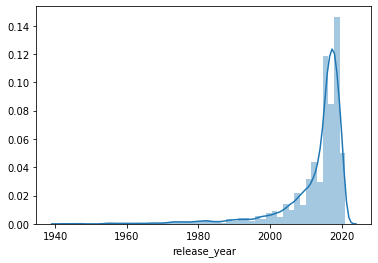

In [64]:
sns.distplot(df['release_year'])

### Menghitung Jumlah Movies dan TV Show yang ada di Netflix berdasarkan Tahun Rilis

In [68]:
df['date_added'].dt.year.value_counts()

2019    1337
2020    1229
2018    1114
2017     752
2016     207
2021      78
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2008       1
2010       1
Name: date_added, dtype: int64

### Jumlah Movies dan TV Show yang ada di Netflix berdasarkan Tahun Rilis dalam Grafik

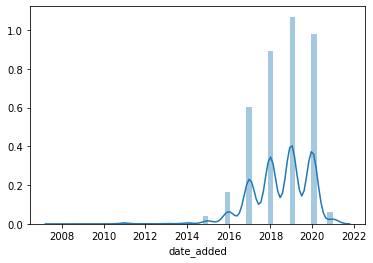

In [56]:
sns.distplot(df['date_added'].dt.year)

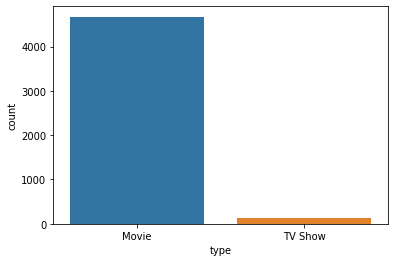

In [94]:
sns.countplot(df['type'])

In [125]:
df['type'].value_counts()

Movie      4673
TV Show     135
Name: type, dtype: int64

In [124]:
df['country'].value_counts()


United States                                        1653
India                                                 832
United Kingdom                                        174
Canada                                                104
Egypt                                                  87
                                                     ... 
Nigeria, United Kingdom                                 1
United States, Morocco                                  1
Ireland, United Kingdom                                 1
Austria, United States                                  1
United Kingdom, United States, Dominican Republic       1
Name: country, Length: 544, dtype: int64

### Melihat Data yang ditambahkan pada Tahun 2021

In [24]:
df.loc[df['date_added'].dt.year == 2021]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
57,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,2021-01-07,2020,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,2009,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
104,s105,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,2021-01-01,2011,R,83 min,"Action & Adventure, Comedies",Two crooks planning a bank heist wind up abduc...
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,2016,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b..."
493,s494,Movie,An Imperfect Murder,James Toback,"Sienna Miller, Alec Baldwin, Charles Grodin, C...",United States,2021-01-13,2017,R,71 min,"Dramas, Thrillers",Haunted by a nightmare involving her abusive e...
...,...,...,...,...,...,...,...,...,...,...,...,...
7145,s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,2021-01-06,2020,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...
7351,s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States",2021-01-01,2011,PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...
7551,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,2021-01-01,2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
7569,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."


menghitung berapa banyak tayangan yang ditambahkan pada tahun 2021

In [43]:
(df['date_added'].dt.year == 2021).value_counts()


False    4730
True       78
Name: date_added, dtype: int64

### Membatasi Data 5 Tahun Terakhir
data tahun yang diambil adalah tahun ditambahkannya film atau TV show tersebut ke Netflix, maksimal di 2020

In [ ]:
th2021_da = df[df['date_added'].dt.year == 2021].index
df.drop(th2021_da, inplace=True)


In [ ]:
(df['date_added'].dt.year == 2021).value_counts()

In [ ]:
df.loc[df['date_added'].dt.year == 2021]


### Data 2016-2020
data dari 2016 sampai dengan 2020 dimasukkan kedalam variable fiveyearadded

In [ ]:
fiveyearadded = df.loc[df['date_added'].dt.year > 2015]
fiveyearadded = fiveyearadded.reset_index(drop=True)
fiveyearadded

### Memastikan Tahun
memastikan data hanya sampai 2020, release year sudah pasti tidak ada yang 2021 karena tidak mungkin film rilis 2021 ditambahkan di Netflix tahun 2020

In [ ]:
fiveyearadded.loc[fiveyearadded['release_year'] == 2021]


In [ ]:
fiveyearadded['date_added']=fiveyearadded['date_added'].dt.year
fiveyearadded.head()

### Jumlah Tiap Tahun Berdasarkan date_added

In [ ]:
totaltahun = fiveyearadded.groupby(['date_added']).count()
totaltahun = totaltahun.filter(['show_id'])
totaltahun.columns = ['count']
pd.DataFrame(totaltahun)
plt.bar(totaltahun.index, totaltahun['count'])
plt.show()


In [ ]:
fiveyearadded['date_added'].value_counts()

In [ ]:
top_ratings = fiveyearadded.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
top_ratings
fig_size = (10,5)
fig, ax = plt.subplots(figsize=fig_size)  
# # sns.pointplot(x='rating',y='count',data=top_ratings)
plt.bar(top_ratings['rating'], top_ratings['count'])
plt.title('Top Ratings Movies and TV Show',size='20')
plt.show()

In [ ]:
fiveyearadded['rating'].value_counts()

In [ ]:
netflix_movies = fiveyearadded.loc[fiveyearadded['type'] == 'Movie']
netflix_tvshow = fiveyearadded.loc[fiveyearadded['type'] == 'TV Show']

netflix_movies.head()


In [ ]:
netflix_tvshow.head()

In [ ]:
def pisah(cols) :
    temp = []
    for i in list(cols) :
        for j in i.split(',') :
            temp.append(bt.conslet(j))
    return temp

most_common_cast = Counter(pisah(netflix_movies['cast'])).most_common(4)

labls = [i[0] for i in most_common_cast]
jml = [i[1] for i in most_common_cast]
plt.bar(labls, jml)
plt.show()

In [ ]:
Counter(pisah(netflix_movies['cast'])).most_common(10)

In [ ]:
set(pisah(netflix_movies['listed_in']))

In [ ]:
Counter(pisah(netflix_movies['listed_in'])).most_common()

In [ ]:
text1 = ''.join(pisah(netflix_movies['listed_in']))
# text3
wordcloud = WordCloud().generate(text1)
# Generate plot
plt.imshow(wordcloud)

plt.axis("off")
plt.title('Word Cloud for Genre of Movie',size='14')
plt.show()

In [ ]:
pd.DataFrame(netflix_movies['country'].value_counts())

In [ ]:
netflix_movies['duration'] = netflix_movies['duration'].str.split(' ').str[0]
mov_dur = netflix_movies['duration'].astype(int)

In [ ]:

sns.kdeplot(data=mov_dur, shade=True, color= 'purple' )

In [ ]:
mov_dur.describe()

In [ ]:
netflix_movies.loc[netflix_movies['duration'] == '8']

In [ ]:
netflix_tvshow['duration'] = netflix_tvshow['duration'].str.split(' ').str[0]
tv_dur = netflix_tvshow['duration'].astype(int)
sns.kdeplot(data=tv_dur, shade=True, color= 'purple' )

In [ ]:
tv_dur.describe()

In [ ]:
netflix_tvshow.loc[netflix_tvshow['duration'] == '15']

In [ ]:
text3 = ', '.join(fiveyearadded['description'])
# text3
wordcloud = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud)

plt.axis("off")
plt.title('Word Cloud for Type of Movie',size='14')
plt.show()


In [ ]:
unique_genre = set()
for i in netflix_movies['listed_in'] :
    for x in bt.conslet_tokenized(i, sep = ',') :
        unique_genre.add(x)
# unique_genre
pd.DataFrame(unique_genre)

In [ ]:
# recent_5yrsA = fiveyearadded[fiveyearadded.date_added > 2015]
top_yearsA = fiveyearadded.groupby(['date_added'])['show_id'].count().reset_index(name='count').sort_values(by='count')
fig_size = (20,7)
fig, ax = plt.subplots(figsize=fig_size)  
sns.pointplot(x='date_added',y='count',data=top_yearsA)

plt.title('Top Years Added Movies and TV Show',size='20')
plt.show()

In [ ]:
df.loc[(df['date_added'] > '2017') & (df['country'] == 'United States')]

In [ ]:
selected_kolom = ['title','listed_in'] 
fiveyearadded[selected_kolom]

In [ ]:
result = []
for _, asd in fiveyearadded.iterrows():
    data = ''
    for i in selected_kolom :
        data += asd[i] + ' '
    data = data [:-1]
    result.append(data)

In [ ]:
fiveyearadded['features'] = result
fiveyearadded

In [ ]:
fiveyearadded['idx'] = fiveyearadded.index 
fiveyearadded

In [ ]:
cm = CountVectorizer().fit_transform(fiveyearadded['features'])

In [ ]:
cs = cosine_similarity(cm)
print(cs)

In [ ]:
cm

In [ ]:
cs.shape

In [ ]:
title ='The Autopsy of Jane Doe'
show_id = fiveyearadded[fiveyearadded.title == title]['idx'].values[0]

In [ ]:
scores = list(enumerate(cs[show_id]))
scores

In [ ]:
urutkan = sorted(scores, key=lambda x:x[1], reverse = True)
urutkan = urutkan[1:]
urutkan

In [ ]:
j=0
print('Most 10 recomended movies and TV Show to', title,'are:\n')
for i in urutkan:
    title = fiveyearadded[fiveyearadded.idx == i[0]]['title'].values[0]
    print(j+1, title + '\n', str(i[1]*100) + "%")
    j=j+1
    if j>9:
        break
